<a href="https://colab.research.google.com/github/austincym/problemset1/blob/main/problemset1cym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#### Load MNIST and show a montage of the images.

In [51]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [52]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [53]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [54]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [55]:
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)


In [56]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [57]:
X.shape

(60000, 1, 28, 28)

In [58]:
x = X[3,0,:,:]

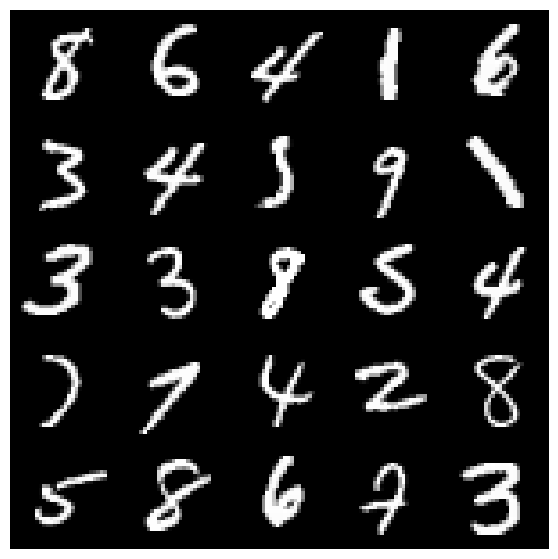

In [59]:
montage_plot(X[125:150,0,:,:])

In [60]:
#### Run a random y=mx model on MNIST

In [61]:
X = X.reshape(X.shape[0],784) #reshape image data tensor from 60000+784
X_test = X_test.reshape(X_test.shape[0],784)

In [62]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [63]:
x.shape

(28, 28)

In [64]:
X = X.T

In [65]:
x.shape

(28, 28)

In [66]:
x = X[:,0:64]

In [67]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

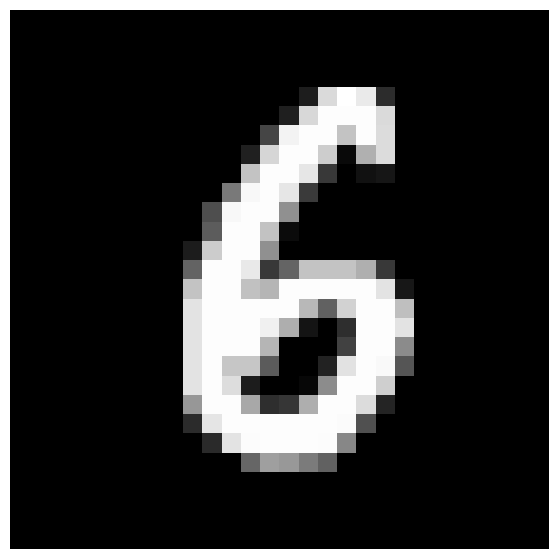

In [68]:
plot(x[:,62].reshape(28,28))

In [69]:
batch_size = 64

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.1719, device='cuda:0')

In [70]:
#### rain random walk model to at least 75% accuracy

In [71]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.04735000059008598
0.0970500037074089
0.13993333280086517
0.1518833339214325
0.16046667098999023
0.17793333530426025
0.18888333439826965
0.18978333473205566
0.19091667234897614
0.19983333349227905
0.2024500072002411
0.21480000019073486
0.22243332862854004
0.23126666247844696
0.25013333559036255
0.2634499967098236
0.27015000581741333
0.2704666554927826
0.27195000648498535
0.2730500102043152
0.2797999978065491
0.28556665778160095
0.29508334398269653
0.29668334126472473
0.29928332567214966
0.30660000443458557
0.30713334679603577
0.30846667289733887
0.3118000030517578
0.31761667132377625
0.3189333379268646
0.3206833302974701
0.3284499943256378
0.3296833336353302
0.33265000581741333
0.3346500098705292
0.33649998903274536
0.34066668152809143
0.3411000072956085
0.34193333983421326
0.34888333082199097
0.35155001282691956
0.3532666563987732
0.3546999990940094
0.35848334431648254
0.36018332839012146
0.367900013923645
0.3694833517074585
0.3722333312034607
0.3748833239078522
0.3800833523273468
0.